## Importing Necessary Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading The datasets

In [3]:
file_path = "C:/Users/Aniket/Downloads/Unemployment_Rate_upto_11_2020.xlsx" 
data = pd.read_excel(file_path)

In [4]:
print("Dataset Overview:")
print(data.head())

Dataset Overview:
           Region        Date Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh  31-01-2020         M                              5.48   
1  Andhra Pradesh  29-02-2020         M                              5.83   
2  Andhra Pradesh  31-03-2020         M                              5.79   
3  Andhra Pradesh  30-04-2020         M                             20.51   
4  Andhra Pradesh  31-05-2020         M                             17.43   

   Estimated Employed  Estimated Labour Participation Rate (%) Region.1  \
0            16635535                                    41.02    South   
1            16545652                                    40.90    South   
2            15881197                                    39.18    South   
3            11336911                                    33.10    South   
4            12988845                                    36.46    South   

   Longitude  Latitude  
0    15.9129     79.74  
1    15.9129     7

## Checking Missing Values

In [5]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Region                                     0
Date                                       0
Frequency                                  0
 Estimated Unemployment Rate (%)           0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region.1                                   0
Longitude                                  0
Latitude                                   0
dtype: int64


## Fill or drop missing values

In [12]:
data = data.dropna()

## Convert date columns to datetime

In [6]:
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])

C:\Users\Aniket\AppData\Local\Temp\ipykernel_13528\1909730794.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


## Analysis Tasks

## Unemployment Rate Distribution

In [7]:
print("Columns in the dataset:")
print(data.columns)

Columns in the dataset:
Index(['Region', 'Date', 'Frequency', ' Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'Longitude', 'Latitude'],
      dtype='object')


In [9]:
data.columns = data.columns.str.strip()

## HistoPlot

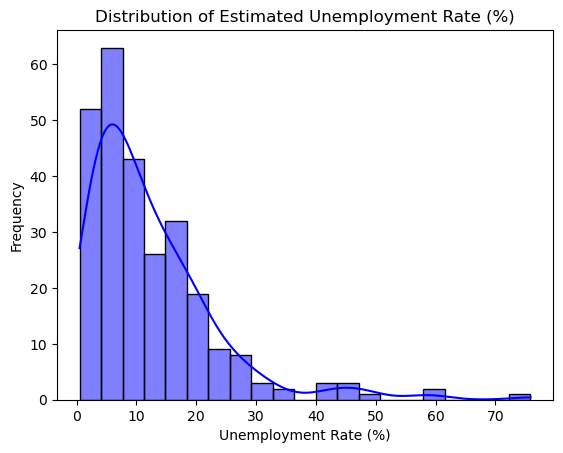

In [10]:
sns.histplot(data['Estimated Unemployment Rate (%)'], kde=True, color='blue')
plt.title('Distribution of Estimated Unemployment Rate (%)')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()

## Trend Analysis of Unemployment Over Time

C:\Users\Aniket\AppData\Local\Temp\ipykernel_13528\1661909585.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=data, ci=None)


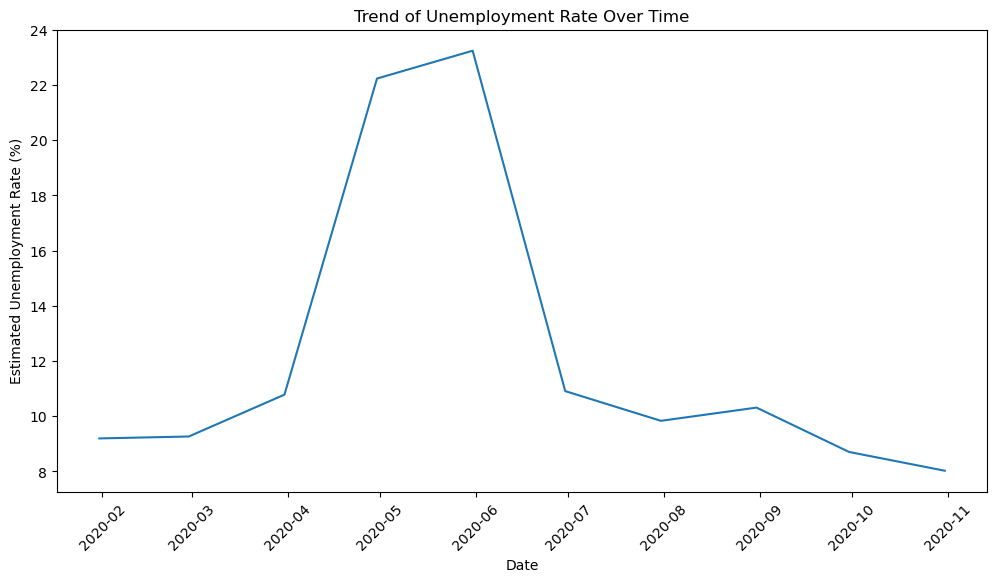

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=data, ci=None)
plt.title('Trend of Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

 ## Region-Wise Average Unemployment Rate

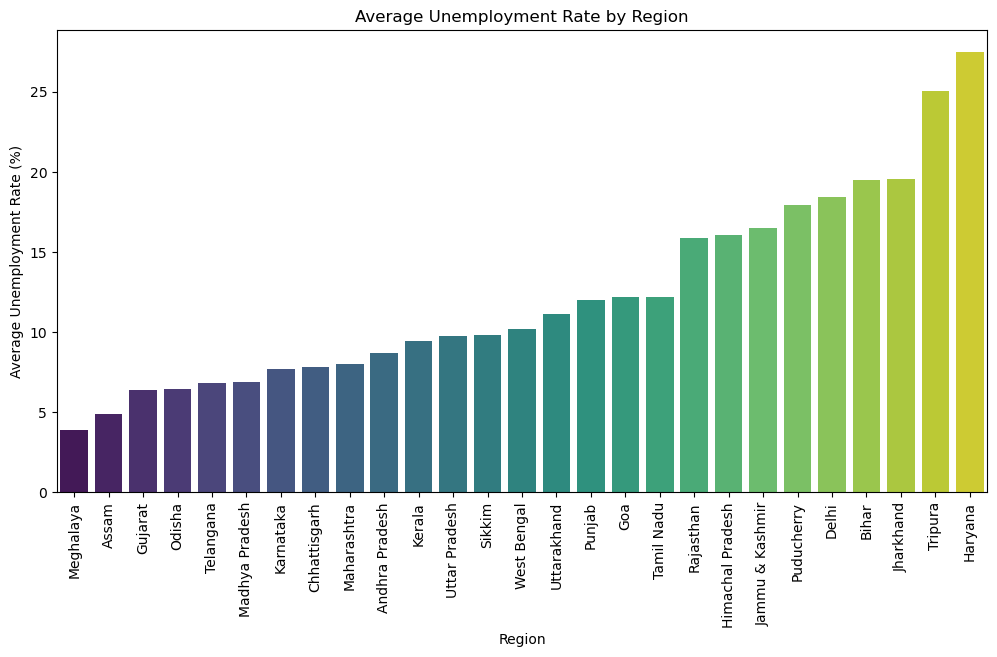

In [12]:
plt.figure(figsize=(12, 6))
region_avg = data.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values()
sns.barplot(x=region_avg.index, y=region_avg.values, palette='viridis')
plt.title('Average Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.show()

##  Correlation Matrix

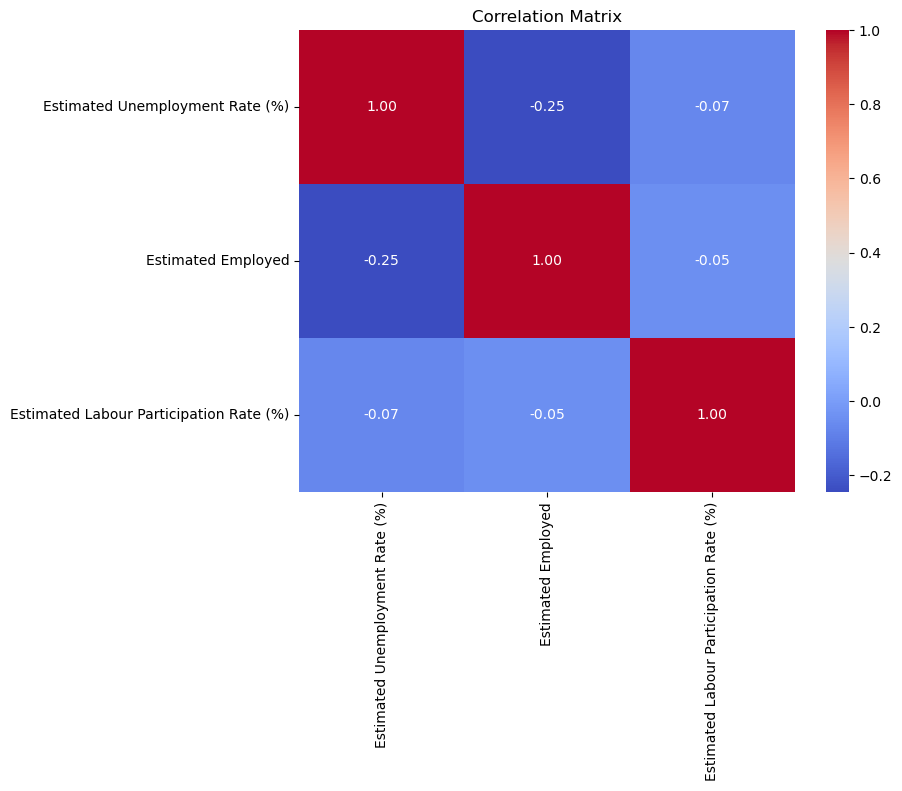

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(data[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']].corr(), 
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Identify Regions with Highest and Lowest Unemployment

In [14]:
highest = data.loc[data['Estimated Unemployment Rate (%)'].idxmax()]
lowest = data.loc[data['Estimated Unemployment Rate (%)'].idxmin()]

print("\nRegion with the Highest Unemployment Rate:")
print(highest[['Region', 'Estimated Unemployment Rate (%)']])
print("\nRegion with the Lowest Unemployment Rate:")
print(lowest[['Region', 'Estimated Unemployment Rate (%)']])


Region with the Highest Unemployment Rate:
Region                             Puducherry
Estimated Unemployment Rate (%)         75.85
Name: 172, dtype: object

Region with the Lowest Unemployment Rate:
Region                             Karnataka
Estimated Unemployment Rate (%)          0.5
Name: 116, dtype: object


## Month-Wise Average Unemployment Rate

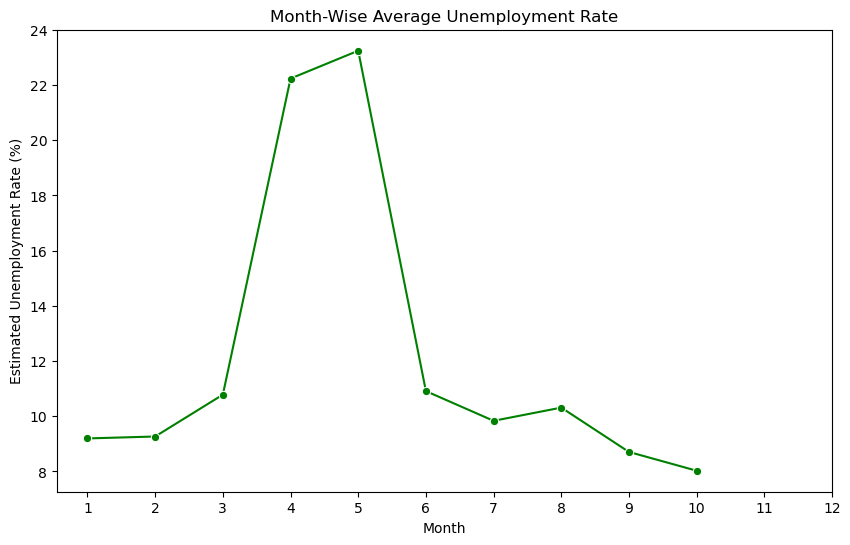

In [15]:
data['Month'] = data['Date'].dt.month
monthly_avg = data.groupby('Month')['Estimated Unemployment Rate (%)'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o', color='green')
plt.title('Month-Wise Average Unemployment Rate')
plt.xlabel('Month')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(range(1, 13))
plt.show()